# Gas Turbine data analysis

In [75]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from mlxtend.plotting import plot_decision_regions

In [76]:
import numpy as np
import pandas as pd
data = pd.read_csv("gt_full.csv",index_col=False)
data.sample(5)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
23571,11.497,1023.2,86.542,3.5913,25.243,1079.3,549.85,135.11,12.040,1.31410,61.503
20574,19.347,1015.2,80.585,5.2361,25.401,1091.0,549.86,135.27,12.182,2.87950,84.336
3003,24.724,1014.5,73.804,3.6416,25.135,1089.3,550.37,132.81,12.038,0.74212,56.578
23640,17.225,1010.9,79.531,3.6732,25.664,1079.7,549.97,133.91,11.905,1.26120,60.265
32012,19.558,1008.0,81.657,2.7954,19.690,1048.7,550.08,109.12,10.416,5.34190,51.366


# Theory


Carbon monoxide (CO) and nitrogen oxide (NOx) are like exhaust fumes from the burning process. They're not ideal, and high levels can indicate a problem with the engine. So, power plants monitor these gases to make sure everything is running smoothly. If the levels are higher than usual (outliers), it might be a sign that something needs attention, like a faulty injector or improper combustion.

Imagine a giant metal pinwheel with three main parts:

1. Air Grabber (Compressor): This big fan sucks in a lot of air, squeezing it tight like a bicycle pump, which heats it up.

2. Burner (Combustor): Here, fuel like natural gas is mixed with the hot air and ignited. This burning creates super hot exhaust.

3. Pinwheel (Turbine): The hot exhaust blasts through the pinwheel blades, spinning them really fast. This spinning action is like a car engine’s pistons moving.

That spinning action is connected to a generator, which uses magnets and coils of wire to convert that spinning motion into electricity, the kind that powers your home!

Why Carbon Monoxide (CO) and Nitrogen Oxide (NOx) are Outlier Detectives:

These two gases are produced during the burning process in the combustor. Ideally, the burning should be very clean, with minimal CO and NOx.

Carbon Monoxide (CO) is like a red flag: It means there might not be enough air for complete burning. This can happen if the air grabber isn't working right. High CO means the engine might be inefficient and releasing harmful pollutants.

Nitrogen Oxide (NOx) is another red flag: It means the burning is too hot. This can damage the engine and create smog. High NOx indicates the engine might need adjustments to run cleaner.

By monitoring CO and NOx emissions, power plant operators can detect when something is off with the gas turbine. It's like checking the engine light in your car – a way to catch problems early and keep the power plant running smoothly and cleanly.


# EDA

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [78]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


Text(0, 0.5, 'Frequency')

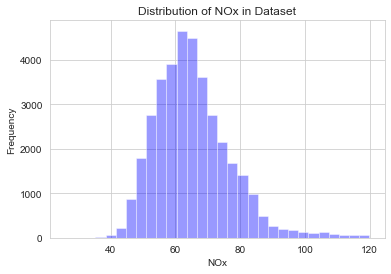

In [79]:

sns.distplot(data['NOX'], kde = False,bins=30,color='blue')
plt.title("Distribution of NOx in Dataset")
plt.xlabel("NOx")
plt.ylabel("Frequency")

In [80]:
x = data['NOX']
x

0         81.952
1         82.377
2         83.776
3         82.505
4         82.028
          ...   
36728     89.172
36729     88.849
36730     96.147
36731     64.738
36732    109.240
Name: NOX, Length: 36733, dtype: float64

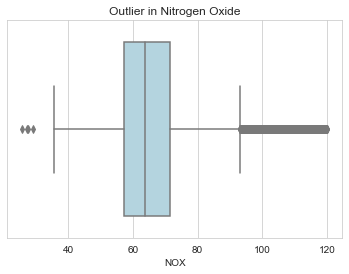

In [81]:
sns.boxplot(x,color='lightBlue',fliersize=5)
plt.title("Outlier in Nitrogen Oxide")
plt.show()

In [70]:
print(x.skew())

1.0267788505165132


In [71]:
highvalue = x.mean()+3*x.std()
lowvalue = x.mean()-3*x.std()
print("high outlier = ",highvalue)
print("low outlier = ",lowvalue)

high outlier =  100.32813907552213
low outlier =  30.257995462903814


In [72]:
data[(data['NOX']>100.32)|(data['NOX']<30.25)]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
453,14.7170,1009.9,88.342,3.9776,24.268,1086.4,549.84,133.67,11.808,0.96789,102.30
1668,9.3772,1021.9,71.852,3.7515,20.452,1050.3,540.83,115.79,10.777,6.89310,100.34
2086,12.0660,1007.9,78.495,3.5795,18.803,1028.2,533.50,105.48,10.260,11.04400,112.56
2087,11.5430,1007.3,79.413,3.6172,18.892,1028.7,533.40,105.76,10.306,11.43200,113.24
2122,19.3310,1003.4,66.236,3.9189,19.329,1031.5,534.10,104.31,10.305,2.96490,116.04
...,...,...,...,...,...,...,...,...,...,...,...
35693,11.5860,1022.7,79.028,2.5930,18.297,1023.4,536.81,101.47,10.140,14.33900,112.61
35767,12.3720,1021.2,82.608,2.6259,18.260,1023.9,537.28,101.53,10.216,14.33500,103.99
36208,5.8072,1018.7,82.476,2.7448,19.025,1016.0,528.93,104.04,10.383,14.47100,115.35
36352,3.2831,1031.1,89.770,2.9365,18.808,1045.9,548.46,108.76,10.397,8.88490,106.30


In [73]:
xy = data[(data['NOX']>100.32)|(data['NOX']<30.25)]

In [74]:
data['NO_contaminate'] = np.where(data['NOX']>100.32,1,0)

In [75]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,NO_contaminate
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,0
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,0
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,0
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,0
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172,0
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849,0
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147,0
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738,0


In [76]:
data.sample(7)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,NO_contaminate
2629,12.928,1012.6,91.924,2.9558,19.220,1057.0,550.17,112.73,10.483,3.5210,73.786,0
36645,11.684,1028.8,65.379,3.1284,21.280,1062.4,549.92,120.10,11.124,3.8244,63.816,0
14140,15.492,1019.1,87.189,2.7818,24.089,1085.9,550.23,132.96,11.926,1.3812,61.621,0
28512,13.108,1015.3,61.550,2.5685,21.874,1065.0,549.88,122.60,11.263,1.6847,67.196,0
29204,11.841,1016.9,70.533,3.4396,28.768,1099.4,547.19,150.97,13.022,2.8056,66.375,0
1149,10.044,1007.6,96.694,4.2279,23.879,1084.0,549.95,133.67,11.781,1.7137,77.598,0
25005,17.144,1012.8,96.404,3.8925,25.228,1080.5,550.02,133.34,11.858,1.6818,58.986,0


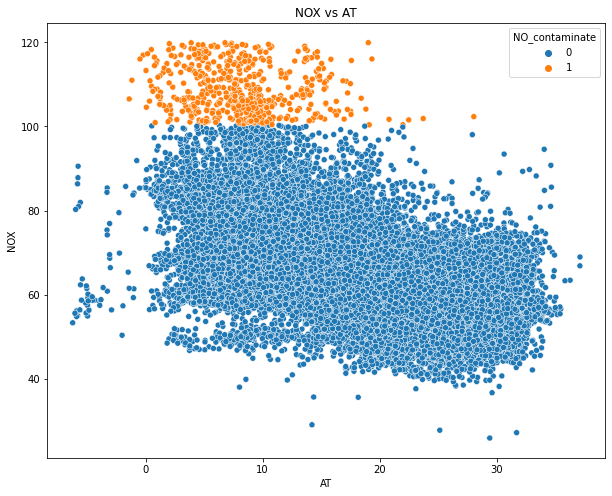

In [171]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'AT',y = 'NOX',data=data,hue='NO_contaminate')
plt.title("NOX vs AT")
plt.show()

# Carbon Monooxide CO

In [38]:
co = data['CO']
co

0         0.32663
1         0.44784
2         0.45144
3         0.23107
4         0.26747
           ...   
36728    10.99300
36729    11.14400
36730    11.41400
36731     3.31340
36732    11.98100
Name: CO, Length: 36733, dtype: float64

Text(0, 0.5, 'Frequency')

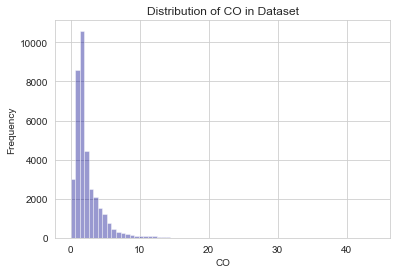

In [48]:
sns.set_style('whitegrid')
sns.distplot(co, kde = False,bins=67,color='darkblue')
plt.title("Distribution of CO in Dataset")
plt.xlabel("CO")
plt.ylabel("Frequency")

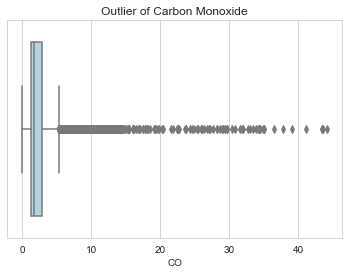

In [58]:
sns.boxplot(co,color='lightBlue',fliersize=5)
plt.title("Outlier of Carbon Monoxide")
plt.show()

In [81]:
print(co.skew())

4.8381739410908615


In [82]:
highvalues = co.mean()+3*co.std()
highvalues

9.160483164831586

In [83]:
yx = data[data['CO']>9.1604]
yx

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,NO_contaminate
2086,12.0660,1007.9,78.495,3.5795,18.803,1028.2,533.50,105.48,10.260,11.0440,112.560,1
2087,11.5430,1007.3,79.413,3.6172,18.892,1028.7,533.40,105.76,10.306,11.4320,113.240,1
2128,8.5672,1000.9,99.901,6.0101,32.013,1099.9,531.38,161.64,13.933,9.4617,99.543,0
2129,8.6376,1001.6,98.271,5.9309,32.105,1100.0,530.69,161.86,13.862,10.7500,102.130,1
2287,17.0630,1017.5,63.913,2.8737,18.492,1036.1,539.51,104.73,10.270,10.0120,97.107,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36599,6.5194,1025.0,77.605,2.7717,18.852,1031.5,538.54,108.10,10.498,11.9210,82.063,0
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172,0
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849,0
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147,0


In [84]:
data['CO_contaminate'] = np.where(data['CO']>9.160,1,0)

In [85]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,NO_contaminate,CO_contaminate
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,0,0
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,0,0
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,0,0
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,0,0
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172,0,1
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849,0,1
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147,0,1
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738,0,0


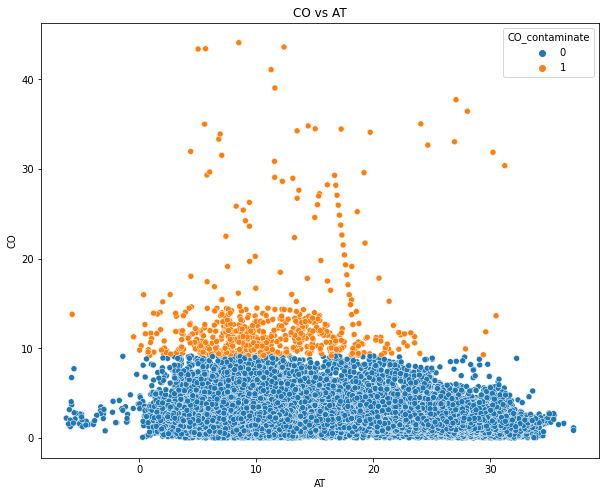

In [172]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'AT',y = 'CO',data=data,hue='CO_contaminate')
plt.title("CO vs AT")
plt.show()

In [113]:
data.to_csv('New_gasturbine.csv',index=False)

In [26]:
gass = pd.read_csv('New_gasturbine.csv')
gass.sample(5)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,NO_contaminate,CO_contaminate
13168,21.980,1009.2,86.181,4.3957,25.559,1090.1,550.34,133.78,12.082,0.7108,62.363,0,0
27699,21.847,1010.7,84.155,5.3210,30.813,1100.1,542.94,150.20,13.325,1.1364,54.103,0,0
21317,17.676,1014.2,87.662,3.2142,24.865,1085.9,549.93,132.23,11.862,2.0932,68.012,0,0
35219,18.086,1018.0,80.375,2.9454,21.601,1061.4,549.44,118.72,11.093,3.3968,54.156,0,0
20983,17.474,1026.8,64.843,3.1673,25.348,1089.9,549.98,134.96,12.044,2.0238,98.630,0,0


In [27]:
gass['NO_contaminate'].value_counts()

NO_contaminate
0    36191
1      542
Name: count, dtype: int64

In [28]:
gass['CO_contaminate'].value_counts()

CO_contaminate
0    36089
1      644
Name: count, dtype: int64

# Balancing NOx data

In [33]:
gassn = gass.iloc[:,0:12]
gassn

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,NO_contaminate
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,0
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,0
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,0
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,0
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172,0
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849,0
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147,0
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738,0


In [34]:
#now we balance our data 
gassn1 = gassn[gassn['NO_contaminate']==1]
print(gassn1.shape)
gassn0 = gassn[gassn['NO_contaminate']==0]
print(gassn0.shape)

gassn0_sample = gassn0.sample(gassn1.shape[0])
print(gassn0_sample.shape)

(542, 12)
(36191, 12)
(542, 12)


In [35]:
balancedn = pd.concat([gassn1,gassn0_sample])
balancedn.shape

(1084, 12)

In [36]:
balancedn.sample(7)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,NO_contaminate
20981,19.0190,1026.9,58.206,3.4587,27.129,1098.9,549.19,141.34,12.542,1.7993,119.910,1
13548,17.6700,1013.7,100.100,3.7072,19.178,1054.3,549.94,108.46,10.448,5.4310,59.711,0
15681,5.1878,1017.2,91.979,2.4890,19.402,1045.9,541.64,112.62,10.628,8.7698,111.110,1
31159,10.1430,1019.8,74.399,4.1690,33.512,1100.1,536.81,158.57,13.758,3.1553,59.211,0
15942,14.5410,1008.7,82.837,3.3834,25.731,1087.1,545.99,137.42,12.245,1.8536,74.575,0
35442,10.5720,1021.1,79.347,2.5895,18.036,1019.8,534.23,101.30,10.259,12.8580,115.410,1
6997,10.9530,1018.1,93.090,3.6473,19.340,1036.8,537.14,108.39,10.508,9.5749,106.910,1


# Balancing CO data

In [39]:
gassc = gass[['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX','CO_contaminate']]
gassc

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,CO_contaminate
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,0
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,0
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,0
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,0
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172,1
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849,1
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147,1
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738,0


In [40]:
#now we balance our data 
gassc1 = gassc[gassc['CO_contaminate']==1]
print(gassc1.shape)
gassc0 = gassc[gassc['CO_contaminate']==0]
print(gassc0.shape)

gassc0_sample = gassc0.sample(gassc1.shape[0])
print(gassc0_sample.shape)

(644, 12)
(36089, 12)
(644, 12)


In [41]:
balancedc = pd.concat([gassc1 ,gassc0_sample])
balancedc.shape

(1288, 12)

In [42]:
balancedc.sample(7)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,CO_contaminate
15884,10.5030,1001.7,99.888,2.5965,19.329,1041.4,541.65,108.54,10.378,10.99200,96.148,1
18917,30.7950,1009.1,53.942,4.2920,25.822,1091.8,549.69,132.01,12.225,1.21630,61.988,0
8610,8.6929,1024.3,90.923,4.2504,20.087,1034.4,533.13,110.31,10.534,9.93230,101.860,1
4424,25.7920,1006.7,94.959,4.5062,29.845,1099.7,541.50,145.32,13.143,0.28376,50.635,0
32264,21.4240,1014.7,75.542,2.8080,19.617,1049.9,550.26,109.33,10.492,4.39470,51.471,0
14881,7.0473,1019.6,96.885,2.4558,19.501,1032.0,532.32,109.21,10.567,11.37400,112.230,1
22777,11.6880,1008.0,96.266,3.6583,25.355,1077.0,550.01,134.35,11.867,1.16210,61.454,0


# Save balanced data

In [44]:
#Nitrogen balanced data
balancedn.to_csv('balanced_no.csv',index_label=False)
#carbon Monoxide data
balancedc.to_csv('balanced_co.csv',index_label=False)

# Loading saved balanced data

In [105]:
#nitrogen oxide
nitro = pd.read_csv('balanced_no.csv')
nitro

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,NO_contaminate
453,14.7170,1009.9,88.342,3.9776,24.268,1086.4,549.84,133.67,11.808,0.96789,102.300,1
1668,9.3772,1021.9,71.852,3.7515,20.452,1050.3,540.83,115.79,10.777,6.89310,100.340,1
2086,12.0660,1007.9,78.495,3.5795,18.803,1028.2,533.50,105.48,10.260,11.04400,112.560,1
2087,11.5430,1007.3,79.413,3.6172,18.892,1028.7,533.40,105.76,10.306,11.43200,113.240,1
2122,19.3310,1003.4,66.236,3.9189,19.329,1031.5,534.10,104.31,10.305,2.96490,116.040,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7422,8.4684,1016.1,86.491,4.0513,23.734,1085.1,550.14,134.24,11.775,1.46720,80.638,0
34844,18.7040,1010.5,82.728,3.0727,19.446,1048.6,549.98,109.24,10.458,4.81730,47.542,0
31902,24.4990,1006.6,60.567,3.8429,27.399,1093.8,549.54,140.77,12.571,1.93240,55.367,0
12445,21.9130,1012.8,93.610,4.3848,25.319,1090.2,549.72,133.84,12.103,2.66150,63.234,0


In [106]:
print((nitro[nitro['NO_contaminate']==1].shape))
print((nitro[nitro['NO_contaminate']==0].shape))   

(542, 12)
(542, 12)


# Machine Learning 

Now we run a machine learning in which we train our algorithm for both NO and CO contamination to train that to find or learn when gas turbine haves high level of Co or No Level.
I have using Classification ML algorithm to train from dataset and see which data set is good with accuracy score 

# NO ML code

In [107]:
x = nitro.iloc[:,0:11]
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1084 entries, 453 to 12193
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      1084 non-null   float64
 1   AP      1084 non-null   float64
 2   AH      1084 non-null   float64
 3   AFDP    1084 non-null   float64
 4   GTEP    1084 non-null   float64
 5   TIT     1084 non-null   float64
 6   TAT     1084 non-null   float64
 7   TEY     1084 non-null   float64
 8   CDP     1084 non-null   float64
 9   CO      1084 non-null   float64
 10  NOX     1084 non-null   float64
dtypes: float64(11)
memory usage: 101.6 KB


In [108]:
y = nitro.iloc[:,-1:]
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1084 entries, 453 to 12193
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   NO_contaminate  1084 non-null   int64
dtypes: int64(1)
memory usage: 16.9 KB


In [109]:
#1Naive Bayes
#2Decision tree 
#3Random forest Classification
#4KNN
#5SVM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)


In [110]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(867, 11)
(217, 11)
(867, 1)
(217, 1)


# Voting ensemble

In [111]:
clf0 = LogisticRegression()
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

estimators = [('LR',clf0),('DTC',clf1),('RFC',clf2),('KNC',clf3)]
for est in estimators:
    x = cross_val_score(est[1],xtrain,ytrain,cv=12,scoring='accuracy')
    print(est[0],np.round(np.mean(x),3))

LR 0.998
DTC 0.999
RFC 0.999
KNC 0.993


In [112]:
votens = VotingClassifier(estimators=estimators)
votens

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier()),
                             ('KNC', KNeighborsClassifier())])

In [113]:
xcx = cross_val_score(votens,xtrain,ytrain,cv=12,scoring='accuracy')
print(np.round(np.mean(xcx),3))

0.999


In [114]:
xcx

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.98611111, 1.        , 1.        ,
       1.        , 1.        ])

In [115]:
votens.fit(xtrain,ytrain)
ypred = votens.predict(xtest)
accur = accuracy_score(ytest,ypred)
print(accur)

1.0


In [116]:
print("train data score = ",votens.score(xtrain,ytrain))
print("test data score = ",votens.score(xtest,ytest))

train data score =  1.0
test data score =  1.0


In [117]:
xtest.sample(4)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
6407,7.0397,1021.4,93.593,3.3101,19.182,1043.4,540.04,111.67,10.513,9.2453,107.03
7450,4.9731,1022.0,85.730,4.0163,23.363,1082.7,550.00,133.75,11.789,2.3359,83.76
16399,3.7246,1018.0,92.117,2.8278,21.619,1060.6,542.67,122.92,11.213,7.1312,113.53
8053,3.6143,1015.0,91.235,4.5492,23.326,1036.2,522.60,122.00,11.424,5.9363,108.26


<Figure size 864x360 with 0 Axes>

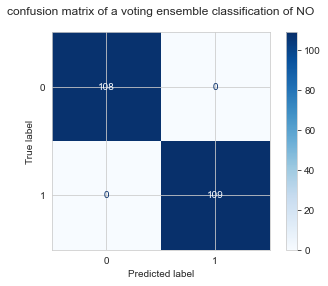

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
plt.figure(figsize=(12,5))
cm = confusion_matrix(ytest,ypred)
cmdisplay = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=votens.classes_)
cmdisplay.plot(cmap='Blues')
plt.title("confusion matrix of a voting ensemble classification of NO\n")
plt.show()


# Saving a  model in separate file 

In [119]:
import joblib
file = "NO_voting.joblib"
joblib.dump(votens,file)


['NO_voting.joblib']

In [120]:
filename = "NO_voting.joblib"
modelss = joblib.load(filename)
ypredict = modelss.predict(xtest)
print(ypredict[0:12])
print(ytest.head(12))

[0 1 1 1 0 0 1 0 1 0 0 1]
       NO_contaminate
35667               0
9535                1
16760               1
29451               1
27684               0
32867               0
16875               1
14706               0
15183               1
4879                0
24555               0
8199                1


In [121]:
acc = accuracy_score(ypredict,ytest)
print(acc)

1.0


In [122]:
#we can create a dummy data to check 
xtest.sample(6)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
16546,12.0090,1009.6,98.390,2.6076,18.988,1048.6,547.51,108.10,10.368,9.4690,101.890
15658,5.1169,1012.4,92.728,2.5400,19.334,1045.9,542.66,111.21,10.487,8.6589,118.230
19745,21.2690,1014.8,84.790,3.6562,20.006,1058.6,550.16,110.67,10.633,4.6369,56.098
24555,17.2610,1003.0,92.703,3.6357,23.809,1071.8,549.73,127.90,11.497,2.8815,60.936
15183,4.8323,1008.3,86.684,2.4689,19.908,1037.0,534.42,112.36,10.602,11.7440,112.640
5706,25.9100,1011.7,63.761,4.0585,25.668,1092.5,550.04,133.80,12.196,4.7548,67.603


In [123]:
xd = [[14.8780,1015.98,5.78,34.67,1200.8,521.65,533.23,167.90,17.84,0.7663,108.76]]
yter=modelss.predict(xd)
print(yter)

if yter == [1]:
    print("contamination level")
else:
    print("Normal level ")

[1]
contamination level


# CO ML Code

In [124]:
balancedc = pd.read_csv('balanced_co.csv')
balancedc

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,CO_contaminate
2086,12.0660,1007.9,78.495,3.5795,18.803,1028.2,533.50,105.48,10.260,11.0440,112.560,1
2087,11.5430,1007.3,79.413,3.6172,18.892,1028.7,533.40,105.76,10.306,11.4320,113.240,1
2128,8.5672,1000.9,99.901,6.0101,32.013,1099.9,531.38,161.64,13.933,9.4617,99.543,1
2129,8.6376,1001.6,98.271,5.9309,32.105,1100.0,530.69,161.86,13.862,10.7500,102.130,1
2287,17.0630,1017.5,63.913,2.8737,18.492,1036.1,539.51,104.73,10.270,10.0120,97.107,1
...,...,...,...,...,...,...,...,...,...,...,...,...
36021,20.4320,1015.5,61.707,3.6422,24.876,1081.1,549.34,132.45,11.984,2.3146,53.810,0
13176,16.7920,1006.2,96.023,3.7891,19.546,1055.7,549.84,110.19,10.418,4.2559,58.224,0
18926,22.8530,1007.4,84.919,4.0536,25.145,1089.1,549.82,133.21,12.004,1.8501,61.443,0
25194,17.9200,1008.6,96.877,4.6614,30.166,1096.9,543.89,149.41,13.127,1.3321,60.298,0


In [125]:
xc = balancedc.iloc[:,0:11]
xc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1288 entries, 2086 to 12435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      1288 non-null   float64
 1   AP      1288 non-null   float64
 2   AH      1288 non-null   float64
 3   AFDP    1288 non-null   float64
 4   GTEP    1288 non-null   float64
 5   TIT     1288 non-null   float64
 6   TAT     1288 non-null   float64
 7   TEY     1288 non-null   float64
 8   CDP     1288 non-null   float64
 9   CO      1288 non-null   float64
 10  NOX     1288 non-null   float64
dtypes: float64(11)
memory usage: 120.8 KB


In [126]:
yc = balancedc.iloc[:,-1:]
yc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1288 entries, 2086 to 12435
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CO_contaminate  1288 non-null   int64
dtypes: int64(1)
memory usage: 20.1 KB


In [127]:
#split data into test and train 
xtrainc,xtestc,ytrainc,ytestc = train_test_split(xc,yc,test_size=0.2)

In [128]:
print(xtrainc.shape)
print(xtestc.shape)
print(ytrainc.shape)
print(ytestc.shape)

(1030, 11)
(258, 11)
(1030, 1)
(258, 1)


# CO Model 

In [129]:
ml0 = LogisticRegression()
ml1 = DecisionTreeClassifier()
ml2 = RandomForestClassifier()
ml3 = KNeighborsClassifier()

estimators = [('LR',ml0),('DTC',ml1),('RFC',ml2),('KNC',ml3)]
for est in estimators:
    x = cross_val_score(est[1],xtrainc,ytrainc,cv=12,scoring='accuracy')
    print(est[0],np.round(np.mean(x),3))

LR 0.997
DTC 0.998
RFC 0.998
KNC 0.965


In [130]:
votenc = VotingClassifier(estimators=estimators)
votenc

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier()),
                             ('KNC', KNeighborsClassifier())])

In [131]:
cox = cross_val_score(votenc,xtrainc,ytrainc,cv=12,scoring='accuracy')
print(np.round(np.mean(cox),3))

0.998


In [132]:
votenc.fit(xtrainc,ytrainc)
ypredc = votenc.predict(xtestc)
accurc = accuracy_score(ytestc,ypredc)
print(accurc)

0.9961240310077519


In [133]:
print("Train data accuracy = ",votenc.score(xtrainc,ytrainc))
print("Test data accuracy = ",votenc.score(xtestc,ytestc))

Train data accuracy =  1.0
Test data accuracy =  0.9961240310077519


<Figure size 864x360 with 0 Axes>

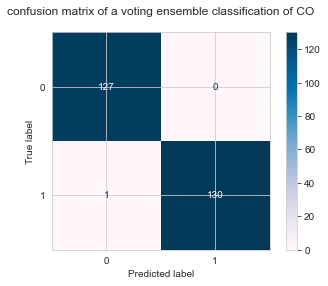

In [134]:
plt.figure(figsize=(12,5))
cmc = confusion_matrix(ytestc,ypredc)
cmdisplay = ConfusionMatrixDisplay(confusion_matrix=cmc,display_labels=votenc.classes_)
cmdisplay.plot(cmap='PuBu')
plt.title("confusion matrix of a voting ensemble classification of CO\n")
plt.show()

# Saving Model in separate file

Now we save our next model into a separate file through joblib 

In [135]:
import joblib
file1 = "CO_voting.joblib"
joblib.dump(votenc,file1)


['CO_voting.joblib']

In [136]:
filenamec = "CO_voting.joblib"
modelcrfc = joblib.load(filenamec)
fg = modelcrfc.predict(xtestc)
print(fg)

[0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1
 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1
 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0]


In [137]:
xtestc.head(3)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
21105,14.1580,1021.0,84.912,4.0523,32.327,1100.1,532.06,156.73,13.792,1.11190,73.509
25657,23.6080,1009.3,69.758,4.8223,31.671,1100.0,541.46,150.15,13.428,0.84823,51.625
23036,6.7452,1022.1,87.474,2.8989,20.181,1051.2,549.97,114.75,10.638,2.49680,63.863


In [138]:
newcarbon = [[10.672,1034.7,78.411,5.3241,32.535,1094.5,678.45,162.34,15.089,7.23451,67.656]]
newpred = modelcrfc.predict(newcarbon)
print(newpred)

if newpred == [0]:
    print("Normal CO Level.")
else :
    print("CO Outlier")

[0]
Normal CO Level.


# Final Testing

Once again i test my both model file to check if it is can check or not 

In [139]:
xtest.sample()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
29934,14.822,999.71,62.183,3.187,27.527,1072.8,550.08,129.04,11.624,3.4416,63.895


In [140]:
import joblib
files1 = "NO_voting.joblib" 
files2 = "CO_voting.joblib"

models1 = joblib.load(files1)
models2 = joblib.load(files2)
print("Enter data to check  \n")
at = float(input("Ambient temperature (AT) [degree C] = "))
ap = float(input("Ambient pressure (AP) [mbar] = "))
ah = float(input("Ambient humidity (AH) [%] = "))
afdp = float(input("Air Filter Difference pressure (AFDP) [mbar] = "))
gtep = float(input("Gas Turbine exhaust pressure (GTEP) [mbar] = "))
tit = float(input("Turbine inlet temperature (TIT) [degree C] = "))
tat = float(input("Turbine After Temperature (TAT) [degree C] = "))
tey = float(input("Turbine Energy Yield (TEY) [MWH] = "))
cdp = float(input("Compressor Discharge Pressure (CDP) [mbar] = "))
co = float(input("Carbon Monoxide (CO) [mg/m3] = "))
no = float(input("Nitrogen oxides (NOx) [mg/m3] = "))

newdata1 = [[at,ap,ah,afdp,gtep,tit,tat,tey,cdp,co,no]]

nopred = models1.predict(newdata1)
copred = models2.predict(newdata1)

print("\n The Result is = \n")
if nopred == [1] and copred == [1]:
    print("Nitrogen oxide and Carbon Monoxide contaminate.")
elif nopred == [0] and copred == [1]:
    print("Carbon Monoxide conatiminate, Nitrogen oxide is normal.")
elif nopred == [1] and copred == [0]:
    print("Nitrogen onoxide conatiminate, Carbon Monoxide is normal.")
else:
    print("Nitrogen oxide and Carbon Monoxide is normal level.")

Enter data to check  

Ambient temperature (AT) [degree C] = 14.822
Ambient pressure (AP) [mbar] = 999.71
Ambient humidity (AH) [%] = 62.183
Air Filter Difference pressure (AFDP) [mbar] = 3.187
Gas Turbine exhaust pressure (GTEP) [mbar] = 27.527
Turbine inlet temperature (TIT) [degree C] = 1072.8
Turbine After Temperature (TAT) [degree C] = 550.08
Turbine Energy Yield (TEY) [MWH] = 129.04
Compressor Discharge Pressure (CDP) [mbar] = 129.04
Carbon Monoxide (CO) [mg/m3] = 11.624
Nitrogen oxides (NOx) [mg/m3] = 3.4416

 The Result is = 

Carbon Monoxide conatiminate, Nitrogen oxide is normal.


# Evaluation matrics of nitrogen oxide model 

In [141]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [142]:
import joblib
files1 = "NO_voting.joblib" 
files2 = "CO_voting.joblib"

models1 = joblib.load(files1)
models2 = joblib.load(files2)

In [143]:
ypredn = models1.predict(xtest)
print("Accuracy score = ",accuracy_score(ytest,ypredn))
print("Recall score = ",recall_score(ytest,ypredn))
print("F1 score = ",f1_score(ytest,ypredn))
print("Accuracy score = ",accuracy_score(ytest,ypredn))
print("Precision score = ",precision_score(ytest,ypredn))

Accuracy score =  1.0
Recall score =  1.0
F1 score =  1.0
Accuracy score =  1.0
Precision score =  1.0


In [144]:
print(classification_report(ytest,ypredn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       109

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



<Figure size 864x360 with 0 Axes>

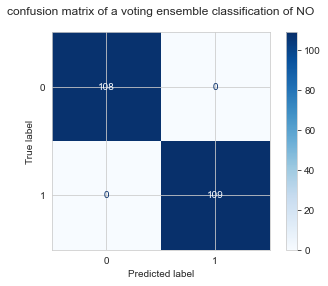

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
plt.figure(figsize=(12,5))

cm = confusion_matrix(ytest,ypredn)
cmdisplay = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=votens.classes_)
cmdisplay.plot(cmap='Blues')
plt.title("confusion matrix of a voting ensemble classification of NO\n")
plt.show()

# Metric evolution of CO emission model

In [146]:
ypredc = models1.predict(xtestc)
print("Accuracy score = ",accuracy_score(ytestc,ypredc))
print("Recall score = ",recall_score(ytestc,ypredc))
print("F1 score = ",f1_score(ytestc,ypredc))
print("Accuracy score = ",accuracy_score(ytestc,ypredc))
print("Precision score = ",precision_score(ytestc,ypredc))

Accuracy score =  0.7170542635658915
Recall score =  0.45038167938931295
F1 score =  0.6178010471204188
Accuracy score =  0.7170542635658915
Precision score =  0.9833333333333333


In [147]:
print(classification_report(ytestc,ypredc))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78       127
           1       0.98      0.45      0.62       131

    accuracy                           0.72       258
   macro avg       0.81      0.72      0.70       258
weighted avg       0.81      0.72      0.70       258



<Figure size 864x360 with 0 Axes>

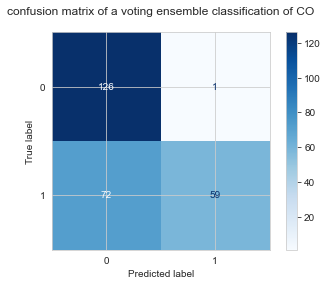

In [148]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
plt.figure(figsize=(12,5))

cm = confusion_matrix(ytestc,ypredc)
cmdisplay = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=votens.classes_)
cmdisplay.plot(cmap='Blues')
plt.title("confusion matrix of a voting ensemble classification of CO\n")
plt.show()